In [29]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

In [ ]:
DATASET_PATH = "/Users/brittaneyjin/Desktop/damage predictor repo/damage-predictor/HurricaneHarvey"
IMG_SIZE = (128, 128)  # Resize images
BATCH_SIZE = 16
NUM_CLASSES = 5  # Adjust based on dataset categories
EPOCHS = 3

In [31]:
def load_datasets(dataset_path, img_size, batch_size):
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "train_another"),
        image_size=img_size,
        batch_size=batch_size
    )
    val_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "validation_another"),
        image_size=img_size,
        batch_size=batch_size
    )
    test_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "test_another"),
        image_size=img_size,
        batch_size=batch_size
    )

    normalization_layer = layers.Rescaling(1.0 / 255)
    train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
    val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
    test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))
    return train_dataset, val_dataset, test_dataset

# Load datasets
train_ds, val_ds, test_ds = load_datasets(DATASET_PATH, IMG_SIZE, BATCH_SIZE)

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2)
])

Found 10000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 9000 files belonging to 2 classes.


In [32]:
# Load datasets
train_ds, val_ds, test_ds = load_datasets(DATASET_PATH, IMG_SIZE, BATCH_SIZE)

Found 10000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 9000 files belonging to 2 classes.


In [33]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2)
])

In [34]:
# VGG16 Architecture

def create_vgg16(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base model
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [35]:
def compile_and_train(model, train_dataset, val_dataset, epochs):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)
    return history

def evaluate_model(model, test_dataset):
    test_loss, test_accuracy = model.evaluate(test_dataset)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    return test_accuracy

def plot_training(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

Training VGG16...
Epoch 1/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 218s 347ms/step - accuracy: 0.8125 - loss: 1.0332 - val_accuracy: 0.9130 - val_loss: 0.2126
Epoch 2/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 249s 398ms/step - accuracy: 0.8897 - loss: 0.2724 - val_accuracy: 0.9100 - val_loss: 0.2078
Epoch 3/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 237s 379ms/step - accuracy: 0.8925 - loss: 0.2697 - val_accuracy: 0.9110 - val_loss: 0.2063
Epoch 4/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 234s 375ms/step - accuracy: 0.8921 - loss: 0.2557 - val_accuracy: 0.9020 - val_loss: 0.2387


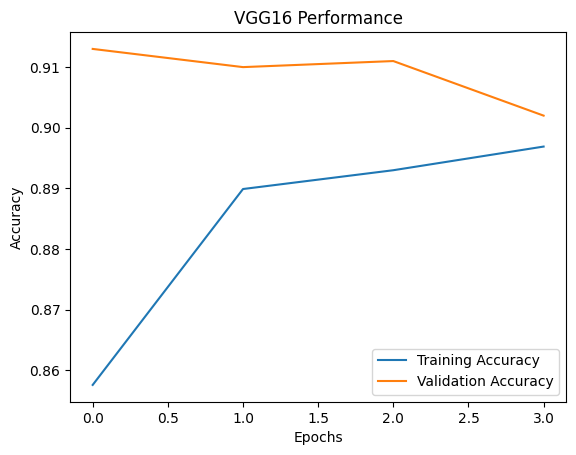

563/563 ━━━━━━━━━━━━━━━━━━━━ 141s 250ms/step - accuracy: 0.8667 - loss: 0.3073
Test Accuracy: 87.49%


0.8748888969421387

In [36]:
input_shape = IMG_SIZE + (3,)  # Input shape for the models

# Train and evaluate VGG16
print("Training VGG16...")
vgg16 = create_vgg16(input_shape, NUM_CLASSES)
vgg16_history = compile_and_train(vgg16, train_ds, val_ds, EPOCHS)
plot_training(vgg16_history, "VGG16 Performance")
evaluate_model(vgg16, test_ds)

In [37]:
from tensorflow.keras.preprocessing import image
import numpy as np

# test
img_path = "/Users/brittaneyjin/Desktop/damage predictor repo/damage-predictor/testingImages/AOI3-tile_5-2_pre_disaster.png"  # Update path as needed
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict with your trained model
prediction = vgg16.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

def load_datasets(dataset_path, img_size, batch_size):
    raw_train = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "train_another"),
        image_size=img_size,
        batch_size=batch_size
    )
    class_names = raw_train.class_names  #capture this BEFORE mapping

    normalization_layer = layers.Rescaling(1.0 / 255)
    train_dataset = raw_train.map(lambda x, y: (normalization_layer(x), y))

    val_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "validation_another"),
        image_size=img_size,
        batch_size=batch_size
    ).map(lambda x, y: (normalization_layer(x), y))

    test_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "test_another"),
        image_size=img_size,
        batch_size=batch_size
    ).map(lambda x, y: (normalization_layer(x), y))

    return train_dataset, val_dataset, test_dataset, class_names

train_ds, val_ds, test_ds, class_names = load_datasets(DATASET_PATH, IMG_SIZE, BATCH_SIZE)
print("Predicted class:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Found 10000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 9000 files belonging to 2 classes.
Predicted class: no_damage


In [38]:
# checking damage folder

from tensorflow.keras.preprocessing import image
import numpy as np
import os

total_dmg = 0

folder = "/Users/brittaneyjin/Desktop/damage predictor repo/damage-predictor/HurricaneHarvey/test/damage"
dmg_results = {}

for file_name in os.listdir(folder):
    img_path = os.path.join(folder, file_name)
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = vgg16.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    label = class_names[predicted_class]

    dmg_results[file_name] = label
    total_dmg += 1

for key in dmg_results:
    print(f"{key}: {dmg_results[key]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

In [39]:
# compare values

dmgNoF = 0

for keys in dmg_results:
    if dmg_results[keys] == 'no_damage':
        dmgNoF += 1
        print(keys)

-95.64638599999999_29.832628000000003.jpeg
-96.897634_28.461071.jpeg
-95.179174_30.032390999999997.jpeg
-93.79975_30.131259000000004.jpeg
-95.609633_29.756409.jpeg
-95.078963_29.826764.jpeg
-95.631423_29.860564.jpeg
-95.64944200000001_29.835136.jpeg
-95.633563_29.854204.jpeg
-93.669493_30.217792.jpeg
-96.934568_28.496004.jpeg
-96.866467_28.777668.jpeg
-95.078415_29.82913.jpeg
-93.79266700000001_30.226762.jpeg
-95.557641_29.769208000000003.jpeg
-96.933086_28.727581.jpeg
-96.872861_28.634386.jpeg
-95.656526_29.831674.jpeg
-96.888346_28.45712.jpeg
-95.08636899999999_29.829490999999997.jpeg
-93.800073_30.036888.jpeg
-95.080779_29.824353000000002.jpeg
-95.097127_29.842066.jpeg
-96.93502_28.729082000000002.jpeg
-95.664949_29.820925.jpeg
-96.988714_28.774821000000003.jpeg
-96.98546_28.785055.jpeg
-93.678446_30.205085999999998.jpeg
-95.65127700000001_29.830852.jpeg
-96.89757_28.460152.jpeg
-96.886596_28.767073.jpeg
-95.634561_29.862071000000004.jpeg
-95.57414200000001_29.759424.jpeg
-96.996028

In [40]:
# checking no damage folder

from tensorflow.keras.preprocessing import image
import numpy as np
import os

total_no = 0

folder = "/Users/brittaneyjin/Desktop/damage predictor repo/damage-predictor/HurricaneHarvey/test/no_damage"
no_dmgResults = {}

for file_name in os.listdir(folder):
    img_path = os.path.join(folder, file_name)
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = vgg16.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    label = class_names[predicted_class]

    no_dmgResults[file_name] = label

    total_no += 1

for key in no_dmgResults:
    print(f"{key}: {no_dmgResults[key]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

In [41]:
# compare values

noDmgF = 0

for keys in no_dmgResults:
    if no_dmgResults[keys] == 'damage':
        noDmgF += 1
        print(keys)

-96.981255_28.76615.jpeg
-96.972004_28.501972.jpeg
-96.97493_28.800534999999996.jpeg
-96.98737_28.763407.jpeg
-96.964979_28.624012.jpeg
-96.98546_28.785055.jpeg
-96.977349_28.771224.jpeg
-96.933984_28.724248.jpeg
-96.982672_28.773296999999996.jpeg
-95.666023_29.836406.jpeg
-95.162836_29.432209000000004.jpeg
-96.99602800000001_28.525226.jpeg
-96.96569699999999_28.662392999999998.jpeg
-96.994074_28.49205.jpeg
-96.99550500000001_28.817715999999997.jpeg
-96.979762_28.810328000000002.jpeg
-96.936237_28.795053000000003.jpeg
-95.29906_29.592405.jpeg
-96.94749399999999_28.716981.jpeg
-96.98983_28.776173999999997.jpeg
-96.981226_28.766701.jpeg
-96.93650699999999_28.728113.jpeg
-96.975888_28.830457.jpeg
-96.99042800000001_28.775361.jpeg
-95.660737_29.8329.jpeg
-96.941006_28.710897999999997.jpeg
-96.978835_28.810349.jpeg
-96.94944100000001_28.720045000000002.jpeg
-96.9952_28.826663.jpeg
-95.169005_29.438871000000002.jpeg
-96.967457_28.815216999999997.jpeg
-97.000443_28.859588000000002.jpeg
-96.97

In [42]:
# comparing true/false values

# DAMAGE FOLDER
print(f'TOTAL DAMAGE FILES: {total_dmg}')
print(f'FALSE NO DAMAGE: {dmgNoF}')

# NO DAMAGE FOLDER
print(f'TOTAL NO DAMAGE FILES: {total_no}')
print(f'FALSE DAMAGE: {noDmgF}')

noFalse = dmgNoF/total_dmg
noFalse = 1-noFalse

dmgFalse = noDmgF/total_no
dmgFalse = 1-dmgFalse

print('\n')

print(f'DAMAGE FOLDER: {noFalse}% ACCURACY')
print(f'NO DAMAGE FOLDER: {dmgFalse}% ACCURACY')


TOTAL DAMAGE FILES: 1000
FALSE NO DAMAGE: 144
TOTAL NO DAMAGE FILES: 1000
FALSE DAMAGE: 60


DAMAGE FOLDER: 0.856% ACCURACY
NO DAMAGE FOLDER: 0.94% ACCURACY
